In [6]:
import numpy as np
import pandas as pd
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib.dates import DateFormatter
import networkx as nx
from adjustText import adjust_text
import plotly.graph_objects as go
import plotly.express as px


In [10]:
data = pd.read_csv("C:/Users/alime/Dropbox/PC/Documents/Coding/2023/ProductHunt_EDA_and_Unspervised_Sentiment_Analysis/Data/Data_From_EDA/Q1_Data.csv")
data.head(5)


,name,votesCount,commentsCount,createdAt,Month,topics,hours,day
0,Perplexity.ai,214,19,2023-02-01 01:10:23+00:00,February,Search,1,1
1,Image Editor AI,46,11,2023-02-01 08:00:00+00:00,February,"Design Tools, Marketing, Tech",8,1
2,RoboHelper,21,5,2023-01-31 21:41:01+00:00,January,Productivity,21,31
3,Dover Autopilot,1118,134,2023-01-31 08:03:56+00:00,January,"Hiring, Artificial Intelligence",8,31
4,Unlimited Voice Transcription with API,873,229,2023-01-31 08:12:31+00:00,January,"Productivity, Privacy",8,31


In [12]:
# Step 1: Feature Engineering
data['createdAt'] = pd.to_datetime(data['createdAt'])
data['month'] = data['createdAt'].dt.month
data['day'] = data['createdAt'].dt.day

# One-hot encode 'topics' column
encoder = OneHotEncoder()
topics_encoded = encoder.fit_transform(data[['topics']]).toarray()
topics_encoded_df = pd.DataFrame(topics_encoded, columns=encoder.get_feature_names(['topics']))

# Concatenate encoded topics with the original dataframe
data_encoded = pd.concat([data, topics_encoded_df], axis=1)

# Step 2: Train-Test Split
X = data_encoded[['hours', 'month', 'day'] + list(topics_encoded_df.columns)]
y = data_encoded['votesCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}



c:\Users\alime\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

# Step 4: Detailed Analysis using StatsModels
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
print(results.summary())

Linear Regression MSE: 1.2032991351954637e+25


KeyboardInterrupt: 

In [4]:

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.184161747849959e+19


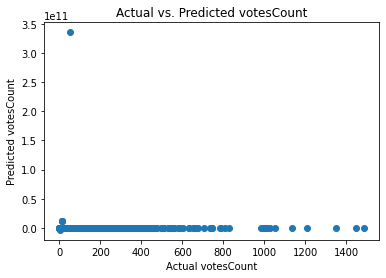

In [5]:
# # Visualize the predicted vs. actual votesCount
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual votesCount')
# plt.ylabel('Predicted votesCount')
# plt.title('Actual vs. Predicted votesCount')
# plt.show()